<a href="https://colab.research.google.com/github/ali-talebi/project_industrial/blob/main/Package_detect_defect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
import numpy as np 
import cv2 
import os 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
import tensorflow as tf
from tensorflow import keras 
from keras.models import Sequential  ,  Model 
from keras.layers import Dense , Dropout , BatchNormalization , Flatten , MaxPooling2D , Conv2D 
from tensorflow.keras.utils import to_categorical 
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import plot_model 
from sklearn.metrics import accuracy_score 

In [3]:
!unzip "/content/drive/MyDrive/Master Courses /Term2/project/archive.zip"

Archive:  /content/drive/MyDrive/Master Courses /Term2/project/archive.zip
  inflating: damaged/side/0101069901524_side.png  
  inflating: damaged/side/0105413725474_side.png  
  inflating: damaged/side/0109451226527_side.png  
  inflating: damaged/side/0111632059302_side.png  
  inflating: damaged/side/0118055224146_side.png  
  inflating: damaged/side/0120928945494_side.png  
  inflating: damaged/side/0122691608037_side.png  
  inflating: damaged/side/0123374171704_side.png  
  inflating: damaged/side/0129768769736_side.png  
  inflating: damaged/side/0163723873967_side.png  
  inflating: damaged/side/0185507921789_side.png  
  inflating: damaged/side/0185973818825_side.png  
  inflating: damaged/side/0188055850357_side.png  
  inflating: damaged/side/0197052530143_side.png  
  inflating: damaged/side/0198998397732_side.png  
  inflating: damaged/side/0205031618492_side.png  
  inflating: damaged/side/0205275090120_side.png  
  inflating: damaged/side/0214448761111_side.png  
  infla

In [5]:
Total_img   = []
Total_lable = []

In [6]:
for i in os.listdir("/content/damaged")  : 
  for j in os.listdir(f"/content/damaged/{i}") : 
    img = cv2.imread(f"/content/damaged/{i}/{j}")  
    img = cv2.resize(img , (224,224)  ) 
    Total_img.append(img)
    Total_lable.append("damaged")

  

    

In [7]:
print("len total data damage : " , len(Total_img) )
print("len total label damage : " , len(Total_lable))

len total data damage :  200
len total label damage :  200


In [8]:
for i in os.listdir("/content/intact")  : 
  for j in os.listdir(f"/content/intact/{i}") : 
    img = cv2.imread(f"/content/intact/{i}/{j}")  
    img = cv2.resize(img ,  (224,224) ) 
    
    Total_img.append(img)
    Total_lable.append("intact") 



  

    

In [9]:
print("len total data damage : " , len(Total_img) )
print("len total label damage : " , len(Total_lable))

len total data damage :  400
len total label damage :  400


In [10]:
Total_img = np.array(Total_img).astype("float") / 255.0 
Total_lable = np.array(Total_lable) 

In [11]:
Total_img.shape 

(400, 224, 224, 3)

In [12]:
Total_lable.shape 

(400,)

In [13]:
Total_lable = Total_lable.reshape(-1 , 1 ) 

In [14]:
Total_lable.shape 

(400, 1)

In [15]:
np.unique(Total_lable)

array(['damaged', 'intact'], dtype='<U7')

In [16]:
x_train , x_test , y_train , y_test = train_test_split(Total_img , Total_lable , test_size = 0.2 , random_state= 42 , shuffle= True  ) 

In [17]:
len(x_test)

80

In [18]:
obj_label_coder = LabelEncoder()
y_train = obj_label_coder.fit_transform(y_train)
y_test  = obj_label_coder.transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [19]:
y_train = to_categorical(y_train , 2 )
y_test  = to_categorical(y_test  , 2 ) 

In [20]:
y_train.shape 

(320, 2)

In [21]:
y_test.shape 

(80, 2)

In [22]:
#y_train = y_train.reshape(-1 ,1  )
#y_test  = y_test.reshape(-1 , 1 ) 


In [23]:
y_test.shape 

(80, 2)

In [24]:
train_datagen =  ImageDataGenerator(
    
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [25]:
train_datagen.fit(x_train)

In [26]:

imgdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=False)
imgdata.fit(x_train)

In [27]:
model = Sequential([
    Conv2D(150 , (3,3) , activation = "relu" , input_shape = x_train.shape[1:] ) , 
    BatchNormalization() , 
    Dropout(0.2) , 


    Conv2D(80 , (5,5) , activation = "relu" ) , 
    BatchNormalization() , 
    Dropout(0.2) , 

    MaxPooling2D() , 


    Conv2D(60 , (3,3) , activation = "relu" ) , 
    BatchNormalization() , 
    Dropout(0.2) , 

    Conv2D(80 , (5,5) , activation = "relu" ) , 
    BatchNormalization() , 
    Dropout(0.2) , 

    MaxPooling2D() , 



    



    Conv2D(50 , (3,3) , activation = "relu" ) , 
    BatchNormalization() , 
    Dropout(0.2) , 
    MaxPooling2D() , 




     




    Flatten() , 

    Dense(128 , activation = "relu" ) , 
    BatchNormalization() , 
    Dropout(0.2) , 

    Dense(100 , activation = "relu" ) , 
    BatchNormalization() , 
    Dropout(0.2) , 

    Dense(80 , activation = "relu" ) , 
    BatchNormalization() , 
    Dropout(0.2) , 

    Dense(50 , activation = "relu" ) , 
    BatchNormalization() , 
    Dropout(0.2) , 

    Dense(10 , activation = "relu" ) , 
    

    Dense(2 , activation = "softmax" ) 

])

In [28]:
model.input 

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'conv2d_input')>

In [29]:
model.output 

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_5')>

In [31]:
model.compile("adam" , loss = "categorical_crossentropy" , metrics = ["acc"] ) 

In [32]:
ali = model.fit(x_train , y_train , epochs = 100 , batch_size= 50 , validation_split= 0.2 )

Epoch 1/100
6/6 [==============================] - 60s 3s/step - loss: 1.1526 - acc: 0.5156 - val_loss: 0.6938 - val_acc: 0.5000
Epoch 2/100
6/6 [==============================] - 9s 2s/step - loss: 0.9697 - acc: 0.5234 - val_loss: 0.7021 - val_acc: 0.4844
Epoch 3/100
6/6 [==============================] - 9s 2s/step - loss: 0.9210 - acc: 0.5312 - val_loss: 0.6991 - val_acc: 0.4375
Epoch 4/100
6/6 [==============================] - 9s 2s/step - loss: 0.8643 - acc: 0.5469 - val_loss: 0.6916 - val_acc: 0.4531
Epoch 5/100
6/6 [==============================] - 9s 2s/step - loss: 0.8613 - acc: 0.5391 - val_loss: 0.7108 - val_acc: 0.4844
Epoch 6/100
6/6 [==============================] - 9s 1s/step - loss: 0.8308 - acc: 0.5312 - val_loss: 0.8426 - val_acc: 0.4844
Epoch 7/100
6/6 [==============================] - 9s 1s/step - loss: 0.8546 - acc: 0.5273 - val_loss: 0.9717 - val_acc: 0.4844
Epoch 8/100
6/6 [==============================] - 9s 1s/step - loss: 0.7687 - acc: 0.5078 - val_loss: 

KeyboardInterrupt: ignored

In [33]:
Base_Model = VGG16(include_top = False  , input_shape = x_train.shape[1:] , weights="imagenet" )

58889256/58889256 [==============================] - 0s 0us/step


In [34]:
Base_Model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [35]:
for layer in Base_Model.layers : 
  layer.trainable = False 





In [36]:
Base_Model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

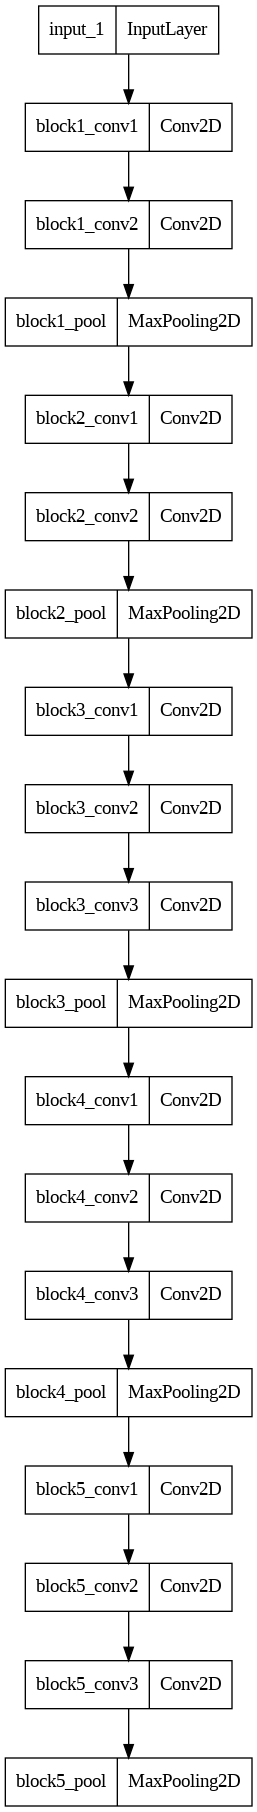

In [37]:
plot_model(Base_Model)

In [45]:
model2 = Sequential([
    Base_Model , 
    Flatten() , 


    Dense(30 , activation = "relu" ) , 
    BatchNormalization() , 
    Dropout(0.2) , 

    Dense(20 , activation = "relu" ) , 
    BatchNormalization() , 
    Dropout(0.2) , 

    Dense(10 , activation = "relu" ) , 




    Dense(2 , activation = "softmax" ) 



])

In [46]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_10 (Dense)            (None, 30)                752670    
                                                                 
 batch_normalization_10 (Bat  (None, 30)               120       
 chNormalization)                                                
                                                                 
 dropout_11 (Dropout)        (None, 30)                0         
                                                                 
 dense_11 (Dense)            (None, 20)                620       
                                                      

In [47]:
model2.compile('adam' , loss = "categorical_crossentropy" , metrics = ['acc'] ) 

In [49]:
ali = model2.fit(x_train , y_train , epochs = 100 , batch_size= 5 , validation_data=(x_test , y_test ) )

Epoch 1/100
64/64 [==============================] - 4s 45ms/step - loss: 0.5339 - acc: 0.7625 - val_loss: 0.8935 - val_acc: 0.5469
Epoch 2/100
64/64 [==============================] - 3s 40ms/step - loss: 0.5458 - acc: 0.7344 - val_loss: 0.7541 - val_acc: 0.6875
Epoch 3/100
64/64 [==============================] - 3s 46ms/step - loss: 0.5958 - acc: 0.6844 - val_loss: 0.8807 - val_acc: 0.4531
Epoch 4/100
64/64 [==============================] - 3s 45ms/step - loss: 0.5938 - acc: 0.6687 - val_loss: 0.6147 - val_acc: 0.7500
Epoch 5/100
64/64 [==============================] - 3s 45ms/step - loss: 0.5408 - acc: 0.7469 - val_loss: 0.6837 - val_acc: 0.5312
Epoch 6/100
64/64 [==============================] - 3s 46ms/step - loss: 0.5546 - acc: 0.7312 - val_loss: 0.5144 - val_acc: 0.7188
Epoch 7/100
64/64 [==============================] - 3s 42ms/step - loss: 0.5504 - acc: 0.7250 - val_loss: 0.5411 - val_acc: 0.7031
Epoch 8/100
64/64 [==============================] - 3s 48ms/step - loss: 0.

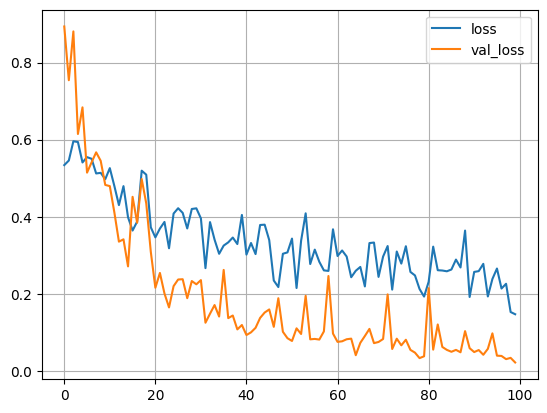

In [64]:
plt.plot(range(100) , ali.history["loss"] , label = "loss" )
plt.plot(range(100) , ali.history["val_loss"] , label = "val_loss" )
plt.legend()
plt.grid()
plt.show()


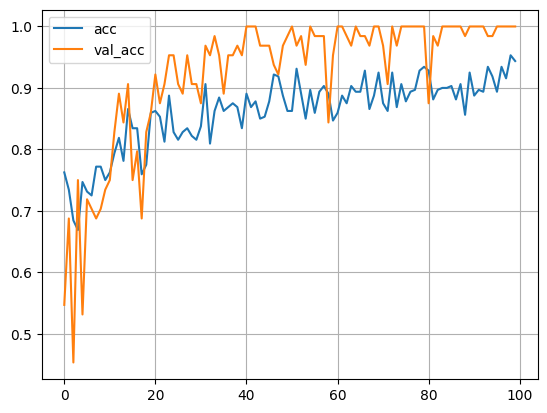

In [65]:
plt.plot(range(100) , ali.history["acc"] , label = "acc" )
plt.plot(range(100) , ali.history["val_acc"] , label = "val_acc" )
plt.legend()
plt.grid()
plt.show()


In [62]:
model2.evaluate(x_test , y_test )

3/3 [==============================] - 0s 116ms/step - loss: 0.9324 - acc: 0.6000


[0.9323509335517883, 0.6000000238418579]

In [51]:
y_predict = model2.predict(x_test)

3/3 [==============================] - 5s 71ms/step


In [54]:
total_result = []

In [55]:
for i in y_predict : 
  result = np.argmax(i)
  total_result.append(result)

In [57]:
total_result2 = obj_label_coder.inverse_transform(total_result)

please enter number on picture in range(0 - 79) 5
predictions is :  damaged
True Answer is :  ['damaged']


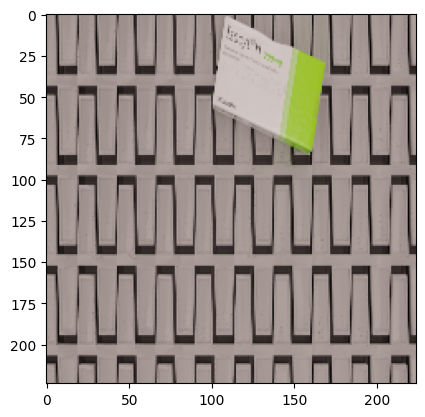

In [71]:
vorodi = int(input("please enter number on picture in range(0 - 79) "))
plt.imshow(x_test[vorodi])
print( "predictions is : " , total_result2[vorodi])
print( "True Answer is : " , obj_label_coder.inverse_transform([np.argmax(y_test[vorodi])]))

plt.show()

please enter number on picture in range(0 - 79) 20
predictions is :  damaged
True Answer is :  ['damaged']


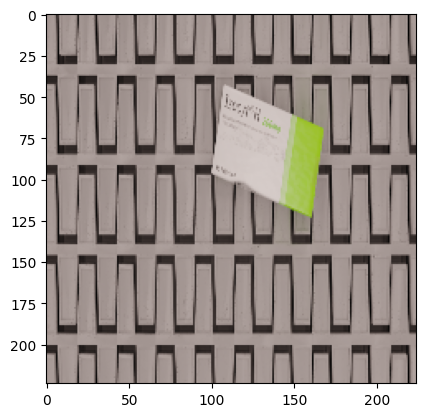

In [72]:
vorodi = int(input("please enter number on picture in range(0 - 79) "))
plt.imshow(x_test[vorodi])
print( "predictions is : " , total_result2[vorodi])
print( "True Answer is : " , obj_label_coder.inverse_transform([np.argmax(y_test[vorodi])]))

plt.show()

please enter number on picture in range(0 - 79) 55
predictions is :  intact
True Answer is :  ['damaged']


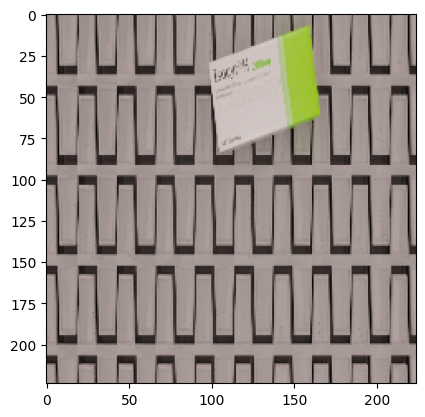

In [73]:
vorodi = int(input("please enter number on picture in range(0 - 79) "))
plt.imshow(x_test[vorodi])
print( "predictions is : " , total_result2[vorodi])
print( "True Answer is : " , obj_label_coder.inverse_transform([np.argmax(y_test[vorodi])]))

plt.show()